In [1]:
# Import all the necessary libraries for analysis and handling warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# "application_data" analysis

In [2]:
#Load application data file and check the shape of raw dataframe
client_dat = pd.read_csv("application_data.csv")
client_dat.shape

(307511, 122)

In [3]:
#Check the data types of all columns in given dataframe
client_dat.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

##### Above result suggests the data frame is of structure 305711 rows x 122 coulums.

In [4]:
#Describe the important statistics relevent to data
client_dat.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


##### Above data suggests there are certain discrepancies related to data such as -ve values of (days_birth,days_employed and etc.). This needs fixation.

In [5]:
#Check on the initial head of the dataframe
client_dat.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# The below function is cretaed to check the total no. of null values in each column and in entire dataframe.
def null_vals(dat):
    return (dat.isnull().mean() * 100).round(2).sort_values(ascending=False)

In [7]:
null_vals(client_dat)

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
                            ...  
NAME_FAMILY_STATUS           0.00
NAME_EDUCATION_TYPE          0.00
NAME_INCOME_TYPE             0.00
AMT_ANNUITY                  0.00
SK_ID_CURR                   0.00
Length: 122, dtype: float64

In [8]:
#Check on unique values in categorical and numerical variables
client_dat.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 122, dtype: int64

In [9]:
#Check on columns having more than half of column values as null.
n_50 = null_vals(client_dat)
n_50 = n_50[n_50 > 50]
print(n_50)
len(n_50)

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAPARTMENTS_MEDI    69.43
FONDKAPREMONT_MODE          68.39
LIVINGAPARTMENTS_MODE       68.35
LIVINGAPARTMENTS_AVG        68.35
LIVINGAPARTMENTS_MEDI       68.35
FLOORSMIN_AVG               67.85
FLOORSMIN_MODE              67.85
FLOORSMIN_MEDI              67.85
YEARS_BUILD_MEDI            66.50
YEARS_BUILD_MODE            66.50
YEARS_BUILD_AVG             66.50
OWN_CAR_AGE                 65.99
LANDAREA_MEDI               59.38
LANDAREA_MODE               59.38
LANDAREA_AVG                59.38
BASEMENTAREA_MEDI           58.52
BASEMENTAREA_AVG            58.52
BASEMENTAREA_MODE           58.52
EXT_SOURCE_1                56.38
NONLIVINGAREA_MODE          55.18
NONLIVINGAREA_AVG           55.18
NONLIVINGAREA_MEDI          55.18
ELEVATORS_MEDI              53.30
ELEVATORS_AVG               53.30
ELEVATORS_MODE

41

#### Above analysis shows that there are 41 columns who have more than 50% null value. Hence, this columns are ignored from further approach and are dropped for further analysis.

In [10]:
#Dropping above 41 columns which are not considered for further analysis and checking on shape after dropping this columns.
n_50_indices = n_50.index
print(n_50_indices)
client_dat.drop(columns = n_50_indices, inplace = True)
client_dat.shape

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE'],
      dtype='object')


(307511, 81)

In [11]:
# Creating a variable n_15 for storing null columns having missing values more than 14%
# Define the threshold for null values
threshold = 14

# Create a boolean mask for columns with more than 14% null values
mask = null_vals(client_dat) > threshold

# Filter the columns using the boolean mask
n_14 = null_vals(client_dat)[mask]
print(n_14)

FLOORSMAX_AVG                   49.76
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
EXT_SOURCE_3                    19.83
dtype: float64


#### From above it is quite evident that only last two columns with least null values percentage i.e. OCCUPATION_TYPE and EXT_SOURCE_3 are the target columns.

In [12]:
#For missing values more than 14%, remove all columns except target columns and check the shape
client_dat.drop(null_vals(client_dat)[null_vals(client_dat) > 14].drop(["OCCUPATION_TYPE", "EXT_SOURCE_3"]).index, axis=1, inplace=True)
client_dat.shape

(307511, 73)

In [13]:
null_vals(client_dat).head()

OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
dtype: float64

#### The above data now looks more reliable. Now after idealisng the correlation, we can see that there is no direct coorelation which exists between these variables. Hence, dropping EXT_SOURCE_3 and EXT_SOURCE_2 from existing dataframe.

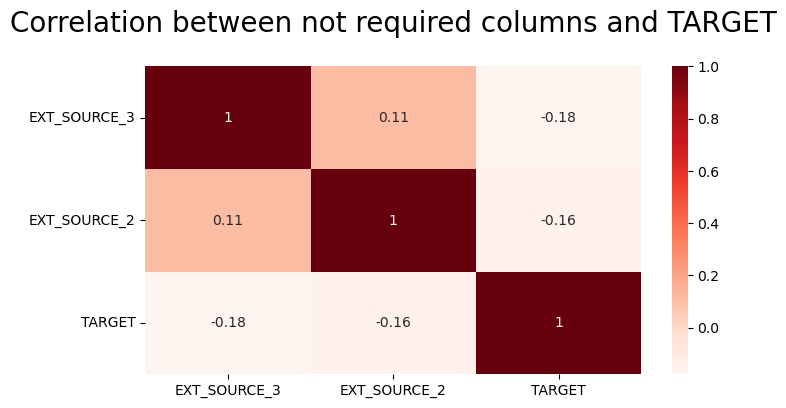

(307511, 71)

In [14]:
not_required=['EXT_SOURCE_3','EXT_SOURCE_2']
plt.figure(figsize=[8, 4])
sns.heatmap(client_dat[not_required + ["TARGET"]].corr(), cmap="Reds", annot=True)
plt.title("Correlation between not required columns and TARGET", fontdict={"fontsize": 20}, pad=25)
plt.show()
client_dat.drop(not_required, axis=1, inplace= True)
client_dat.shape

### Impute missing values 

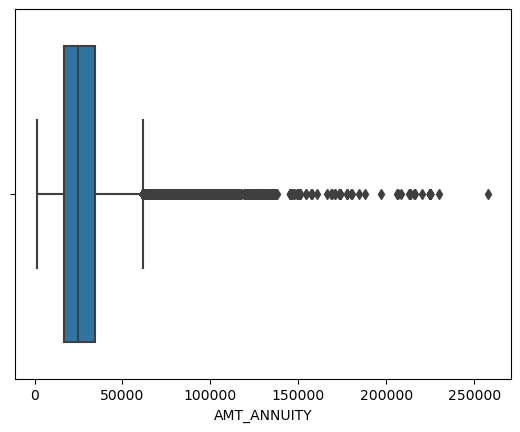

In [15]:
#Check for AMT_ANNUITY column if there are any outliers
sns.boxplot(x=client_dat["AMT_ANNUITY"])
plt.show()

In [16]:
client_dat[client_dat.AMT_ANNUITY.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,6.0
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,11.0
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0
207186,340147,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,...,0,0,0,0,0.0,0.0,1.0,1.0,0.0,2.0
227939,364022,0,Cash loans,F,N,Y,0,315000.0,628069.5,NaN,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,2.0


### There are two many outliers and hence can be either treated with median as this is numeric variable or completely deleted.

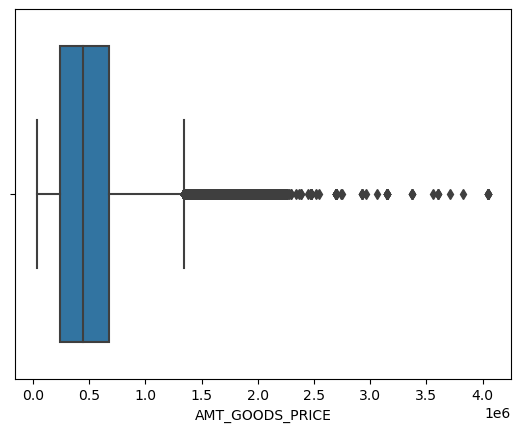

In [17]:
#Check for AMT_GOODS_PRICE column if there are any outliers
sns.boxplot(x=client_dat["AMT_GOODS_PRICE"])
plt.show()

In [18]:
client_dat.AMT_GOODS_PRICE.isnull().sum()

278

In [19]:
#Check for NAME_TYPE_SUITE column if there are any outliers
client_dat.NAME_TYPE_SUITE.isnull().sum()

1292

#### Since there are missing values and it is categorical variable, this values are replaced by mode value.

In [20]:
#Code for replacing with mode value
client_dat["NAME_TYPE_SUITE"].fillna(client_dat["NAME_TYPE_SUITE"].mode()[0], inplace=True) 

In [21]:
#Check for OCCUPATION_TYPE column if there are any outliers
client_dat.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

#### This can be an important column moving forward. Hence, we will move forward with treating them as missing values.

In [22]:
#Code for treating null values as missing values
client_dat["OCCUPATION_TYPE"].fillna("Unknown", inplace=True) 

In [23]:
#Check for CNT_FAM_MEMBERS column if there are any outliers
client_dat.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [24]:
#Try to fill this values using mode from the column
client_dat['CNT_FAM_MEMBERS'].fillna(client_dat['CNT_FAM_MEMBERS'].mode()[0], inplace=True)

In [25]:
#Check on info in dataframe
client_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [26]:
#Change incorrect datatypes of certain columns
client_dat['REG_REGION_NOT_WORK_REGION'] = pd.Series(client_dat['REG_REGION_NOT_WORK_REGION'], dtype=object)

In [27]:
#Change incorrect datatypes of certain columns
client_dat['LIVE_REGION_NOT_WORK_REGION'] = pd.Series(client_dat['LIVE_REGION_NOT_WORK_REGION'], dtype=object)

In [28]:
#Change incorrect datatypes of certain columns
client_dat['REG_CITY_NOT_LIVE_CITY'] = pd.Series(client_dat['REG_CITY_NOT_LIVE_CITY'], dtype=object)

In [29]:
#Change incorrect datatypes of certain columns
client_dat['REG_CITY_NOT_WORK_CITY'] = pd.Series(client_dat['REG_CITY_NOT_WORK_CITY'], dtype=object)

In [30]:
#Change incorrect datatypes of certain columns
client_dat['LIVE_CITY_NOT_WORK_CITY'] = pd.Series(client_dat['LIVE_CITY_NOT_WORK_CITY'], dtype=object)

In [31]:
#Check on dataframe description depicting values
client_dat.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [32]:
#Change -ve values of dates to +ve
client_dat['DAYS_BIRTH'] = client_dat['DAYS_BIRTH'].abs()

In [33]:
#Change -ve values of dates to +ve
client_dat['DAYS_EMPLOYED'] = client_dat['DAYS_EMPLOYED'].abs()

In [34]:
#Change -ve values of dates to +ve
client_dat['DAYS_ID_PUBLISH'] = client_dat['DAYS_ID_PUBLISH'].abs()

In [35]:
#Change -ve values of dates to +ve
client_dat['DAYS_REGISTRATION'] = client_dat['DAYS_REGISTRATION'].abs()

In [36]:
#Check on dataframe decription again
client_dat.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,139443.751806,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## Now we will carry out univariate analysis of unordered type categorical variables.

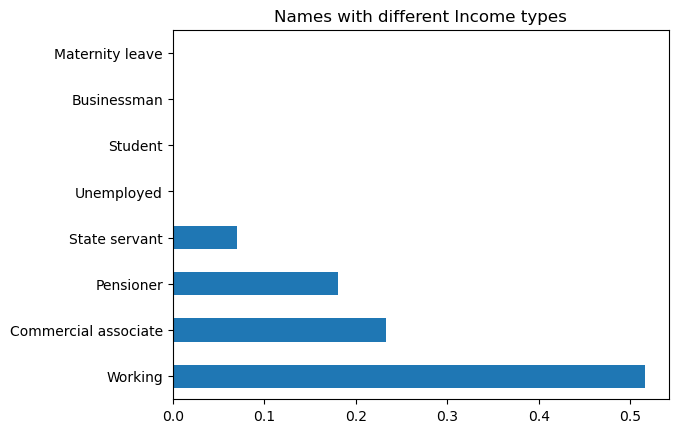

In [37]:
#Representing bar graph in percentage wise for different Income types
client_dat['NAME_INCOME_TYPE'].value_counts(normalize=True).plot(kind='barh', title="Names with different Income types"); plt.show()

In [38]:
#Represent above graph in more numerically precise manner
client_dat.NAME_INCOME_TYPE.value_counts(normalize=True)

Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

In [39]:
#Look at Gender Distribution
client_dat.CODE_GENDER.value_counts(normalize=True)

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

#### Conclusion: (a) Working associates make the most income while those on maternity leave make the least.                                        (b) There are more female clients than male clients, the income type of "maternity leave" is still associated with the fewest clients. Thus, it is conclusive that families do not ask for loans when they are expecting since they have other financial obligations for the upcoming addition to the family.

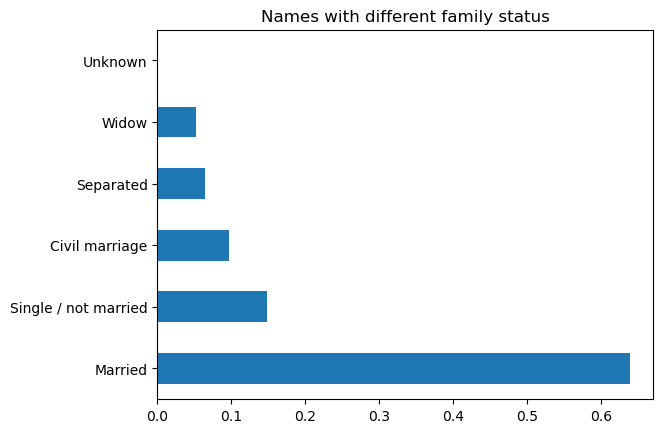

In [40]:
#Representing bar graph in percentage wise for different Family status types
client_dat['NAME_FAMILY_STATUS'].value_counts(normalize=True).plot(kind='barh', title="Names with different family status"); plt.show()

#### Conclusion: It is observed from above graph that people having "Married" status apply for loan the most. 

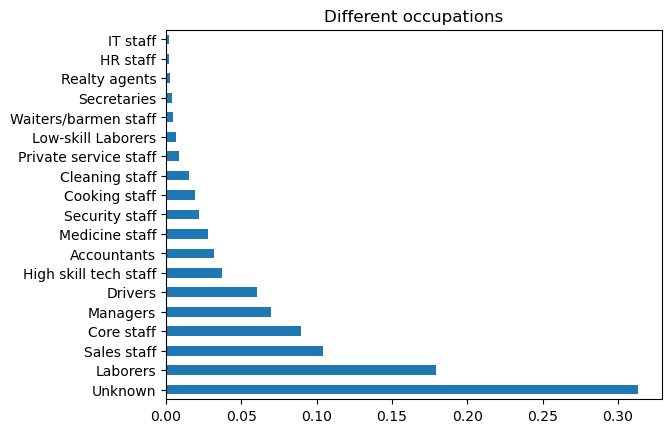

In [41]:
#Representing bar graph in percentage wise for different occupation types
client_dat['OCCUPATION_TYPE'].value_counts(normalize=True).plot(kind='barh', title="Different occupations"); plt.show()

#### Conclusion: From all the clients, mostly are of unknown profession followed by laborers and sales staff. The least are from IT.

## Now we will carry out univariate analysis of ordered type categorical variables.

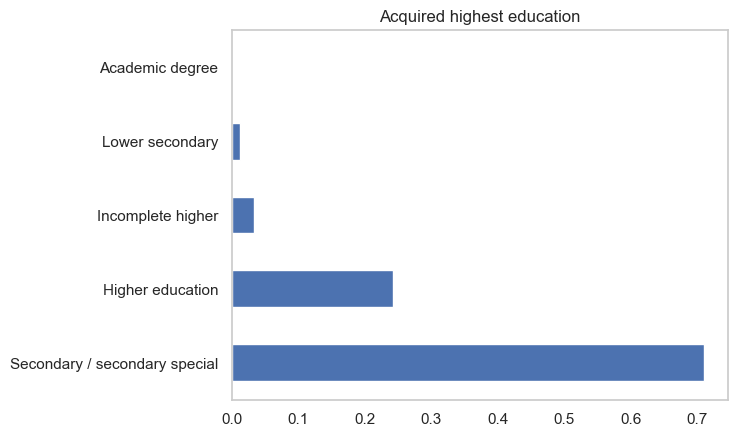

In [82]:
#Representing bar graph in percentage wise for acquired highest education types
client_dat['NAME_EDUCATION_TYPE'].value_counts(normalize=True).plot(kind='barh', title="Acquired highest education"); plt.grid(False); plt.show()

#### Conclusion: Most of the clients have acquired secondary education as highest qualification.

## Now we will carry out univariate analysis of numerical variables. 

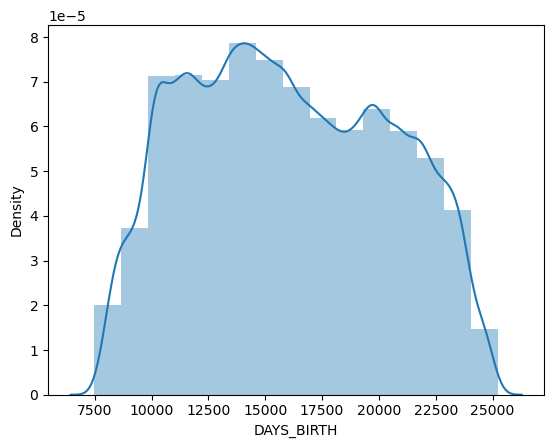

In [43]:
#Consider histogram with kernal estimate density plot for age for birth_days 
sns.distplot(client_dat['DAYS_BIRTH'], bins=15, kde=True)
plt.show()

In [44]:
#To depict better understanding, considering treating days_birth it as categorical variable from numerical type
client_dat['AGE_RANGE'] = pd.cut(client_dat['DAYS_BIRTH'], bins=[0, 7300, 10950, 14600, 18250, 21900, 25500], labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60-70'], right=False)

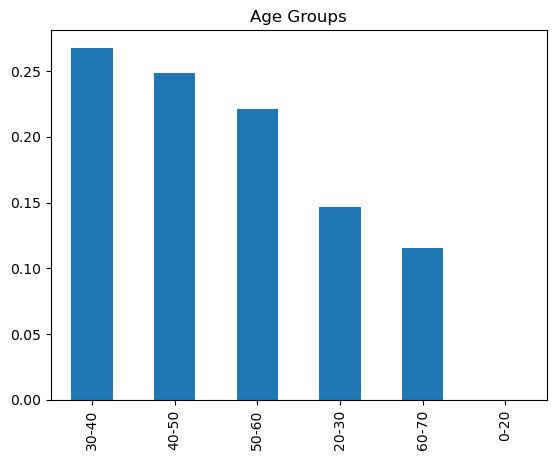

In [45]:
client_dat['AGE_RANGE'].value_counts(normalize=True).plot.bar(title="Age Groups")
plt.show()

#### Conclusion: Most of the people belong to age category of 30-40. 

In [46]:
#To depict better understanding, considering treating income_amount it as categorical variable from numerical type
client_dat['AMT_INCOME_RANGE'] = pd.cut(client_dat['AMT_INCOME_TOTAL'], bins=[0,200000,400000,10000000], labels=['Modest','Average','Highest'], right=False)

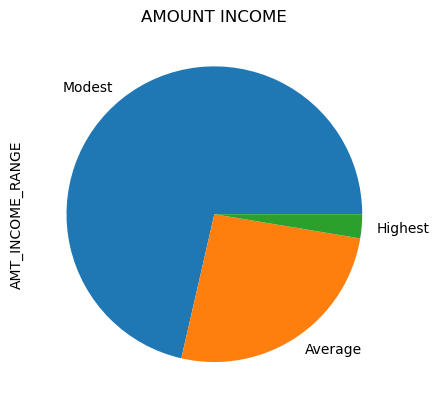

In [47]:
#Plot a descriptive pie chart
data = client_dat['AMT_INCOME_RANGE'].value_counts(normalize=True)
data.plot.pie()
plt.title("AMOUNT INCOME")
plt.show()

#### Conclusion: As can be seen from pie chart, majority of the clients are modest income holders. Hence, they are the ones who need loans more often in contrast to the high earning ones. 

In [48]:
#To depict better understanding, considering treating credit_amount it as categorical variable from numerical type
client_dat['AMT_CREDIT_RANGE'] = pd.cut(client_dat['AMT_CREDIT'], bins=[0,350000,700000,10000000], labels=['Modest','Average','Highest'], right=False)

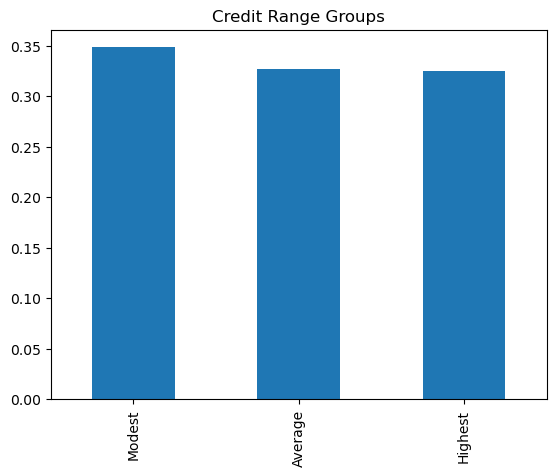

In [49]:
client_dat['AMT_CREDIT_RANGE'].value_counts(normalize=True).plot.bar(title="Credit Range Groups")
plt.show()

#### Conclusion: From the above graph it is clear that most clients apply with modest amount of credit for loan.

## Now we will carry out analysis for computing percentage of imbalance

In [50]:
(client_dat['TARGET'].value_counts(normalize=True) * 100)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

#### Conclusion: 8.07% of clients have difficulties in payments while 91.93% dont face any difficulties. 

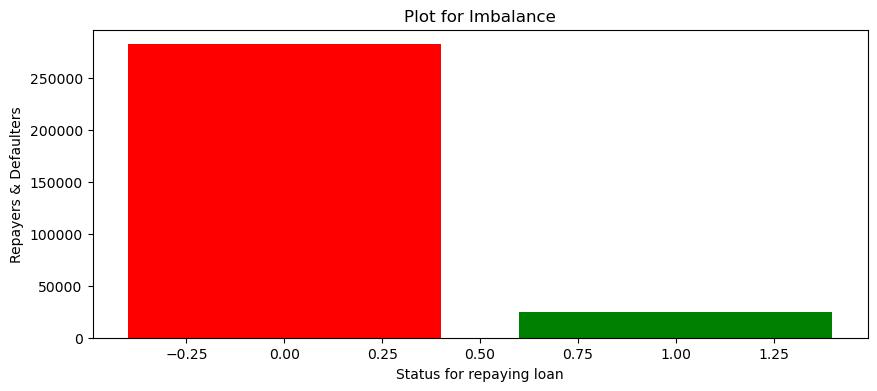

In [51]:
#Code for generating an imbalance plot for repayers and defaulters
imbalance = client_dat["TARGET"].value_counts().reset_index()
imbalance.columns = ['Loan Repayment Status', 'Count']

plt.figure(figsize=(10, 4))
plt.bar(imbalance['Loan Repayment Status'], imbalance['Count'], color=['r', 'g'])
plt.xlabel("Status for repaying loan")
plt.ylabel("Repayers & Defaulters")
plt.title("Plot for Imbalance")
plt.show()

In [52]:
#Divide the dataset into ones(having payment difficulty) and zeroes(no difficulty in paying)
ones, zeroes = client_dat[client_dat['TARGET'] == 1], client_dat[client_dat['TARGET'] == 0]

## ## Now we will carry out univariate analysis for target variable

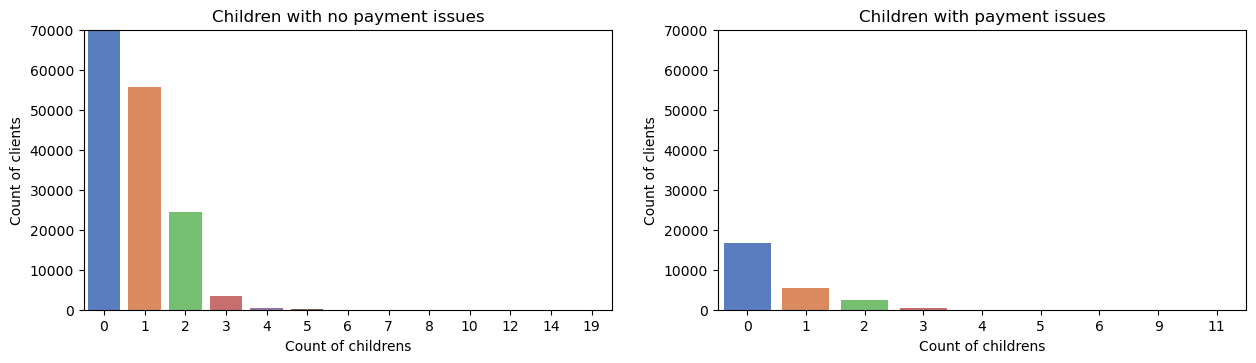

In [53]:
#Below code for analysis carried on age for zeroes and ones dataframes
plt.figure(figsize=(15, 8))

# Subplot 1
plt.subplot(2, 2, 1)
plt.ylim(0, 70000)
plt.title('Children with no payment issues')
sns.countplot(x='CNT_CHILDREN', data=zeroes, palette='muted')
plt.ylabel('Count of clients')
plt.xlabel('Count of childrens')

# Subplot 2
plt.subplot(2, 2, 2)
plt.title('Children with payment issues')
plt.ylim(0, 70000)
sns.countplot(x='CNT_CHILDREN', data=ones, palette='muted')
plt.ylabel('Count of clients')
plt.xlabel('Count of childrens')

plt.show()

#### Conclusion: From above plots, it is evident that bank can consider to give away loans for client having no children. 

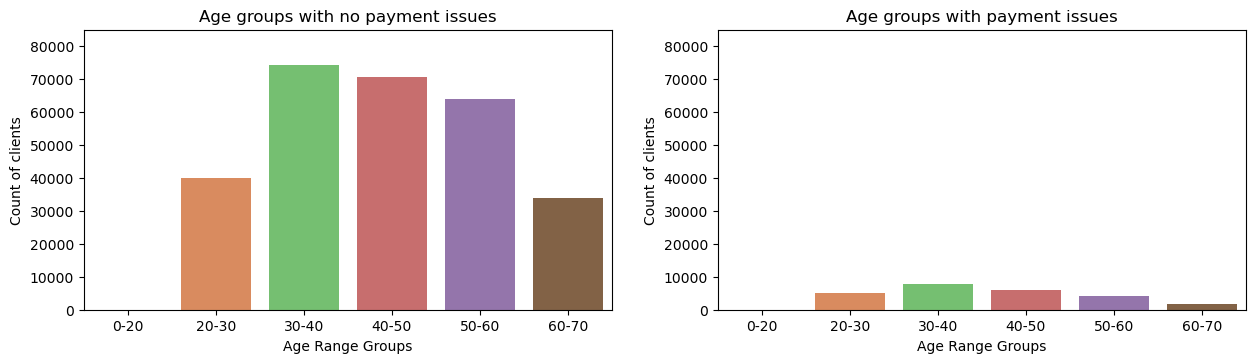

In [54]:
#Below code for analysis carried on age groups for zeroes and ones dataframes
plt.figure(figsize=(15, 8))

# Subplot 1
plt.subplot(2, 2, 1)
plt.ylim(0, 85000)
plt.title('Age groups with no payment issues')
sns.countplot(x='AGE_RANGE', data=zeroes, palette='muted')
plt.ylabel('Count of clients')
plt.xlabel('Age Range Groups')

# Subplot 2
plt.subplot(2, 2, 2)
plt.title('Age groups with payment issues')
plt.ylim(0, 85000)
sns.countplot(x='AGE_RANGE', data=ones, palette='muted')
plt.ylabel('Count of clients')
plt.xlabel('Age Range Groups')

plt.show()

#### Conclusion: As most of the clients lie in the age group between 30 and 40, banks should lend out loans to this particular groups since they are also able to repay back.

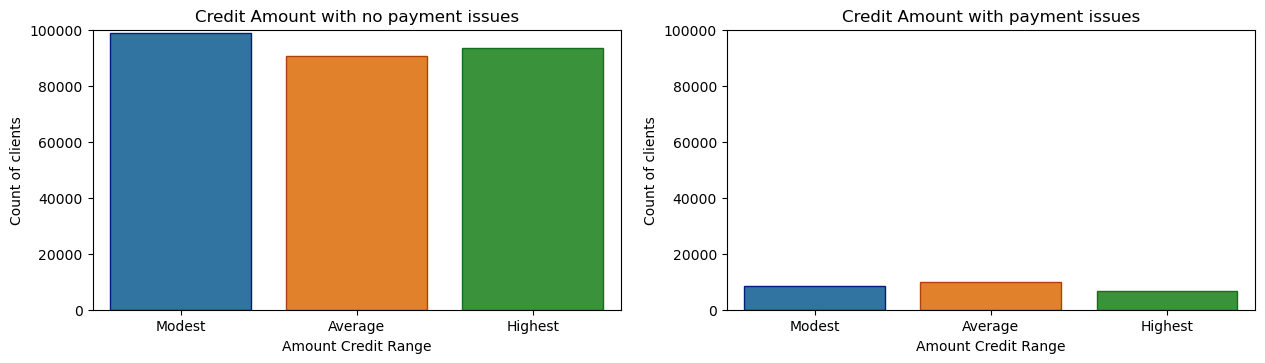

In [55]:
#Below code for analysis carried on age groups for zeroes and ones dataframes
plt.figure(figsize=(15, 8))

# Subplot 1
plt.subplot(2, 2, 1)
plt.ylim(0, 100000)
plt.title('Credit Amount with no payment issues')
sns.countplot(x='AMT_CREDIT_RANGE', data=zeroes, edgecolor=sns.color_palette("dark", 3))
plt.ylabel('Count of clients')
plt.xlabel('Amount Credit Range')

# Subplot 2
plt.subplot(2, 2, 2)
plt.title('Credit Amount with payment issues')
plt.ylim(0, 100000)
sns.countplot(x='AMT_CREDIT_RANGE', data=ones, edgecolor=sns.color_palette("dark", 3))
plt.ylabel('Count of clients')
plt.xlabel('Amount Credit Range')

plt.show()

#### Conclusion: From the plot it can be seen that modest credit amounts are repaid more easily. This aspect can be looked up by banks while lending loans.

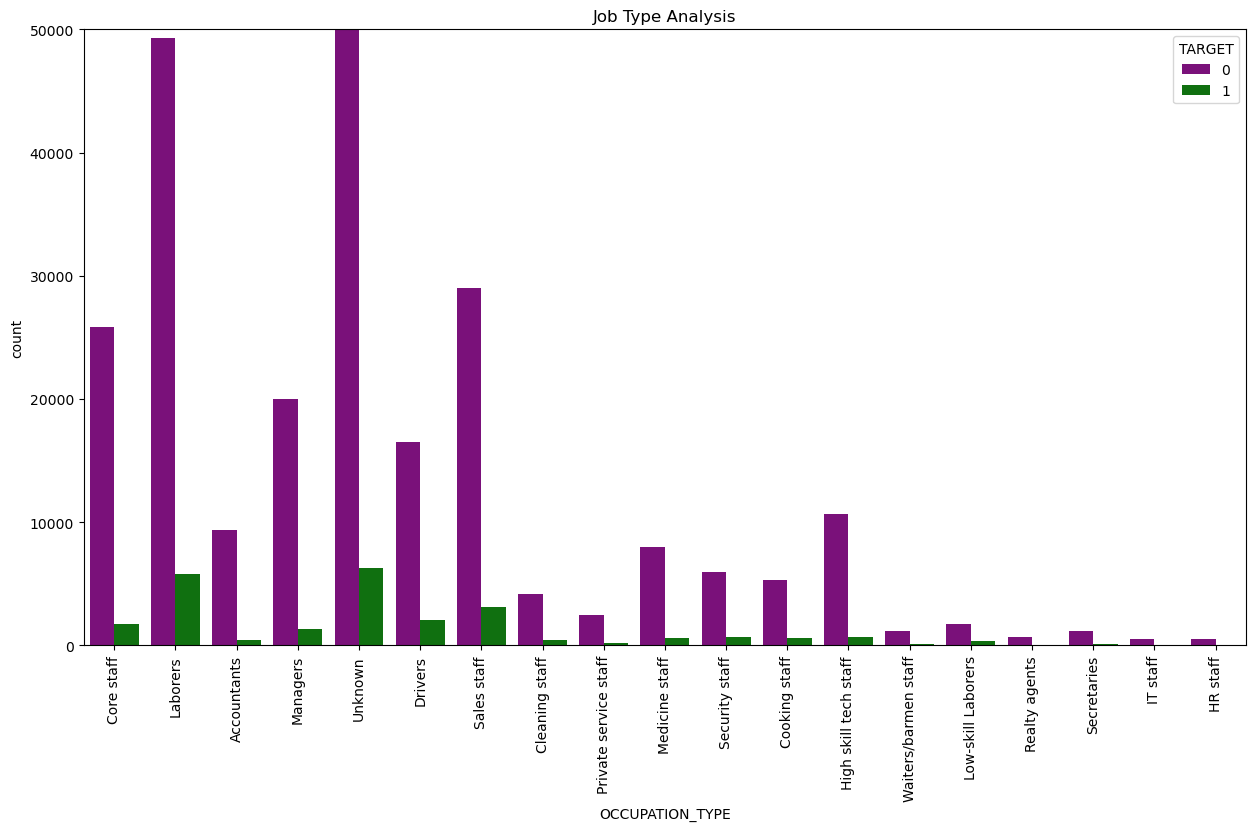

In [56]:
#OCCUPTAION_TYPE variable analysis for payment without difficulties(zeroes) and payment with difficulty(ones) dataframe.
# Set a darker color palette
dark_palette = ["#8B008B", "#008000"]

# Set the figure size
plt.figure(figsize=(15, 8))

# Create a countplot with 'hue' for target values
sns.countplot(data=pd.concat([zeroes, ones]), x='OCCUPATION_TYPE', hue='TARGET', palette=dark_palette, order=zeroes['OCCUPATION_TYPE'].unique())
plt.title('Job Type Analysis')
plt.ylim(0, 50000)
plt.xticks(rotation=90)

plt.show()

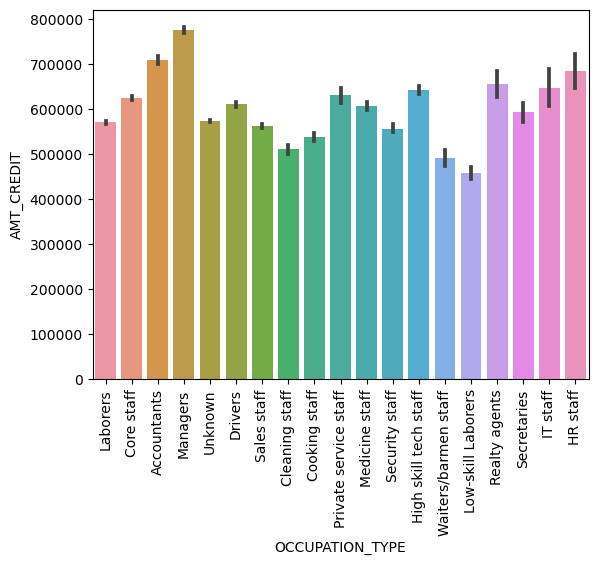

In [57]:
#Credit amount visualised based on similar occupation groups
sns.barplot(x="OCCUPATION_TYPE", y="AMT_CREDIT", data=client_dat, estimator=np.mean)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

#### Conclusion: From above plots, (a) it is not conclusive to decide whether to lend loans to laborers or not since they have highest count in both target groups. However, they can be lended small amount of loans to this particular client group while (b) sales, core, IT and HR staff can be lended loans easily due to their repaying ability. 

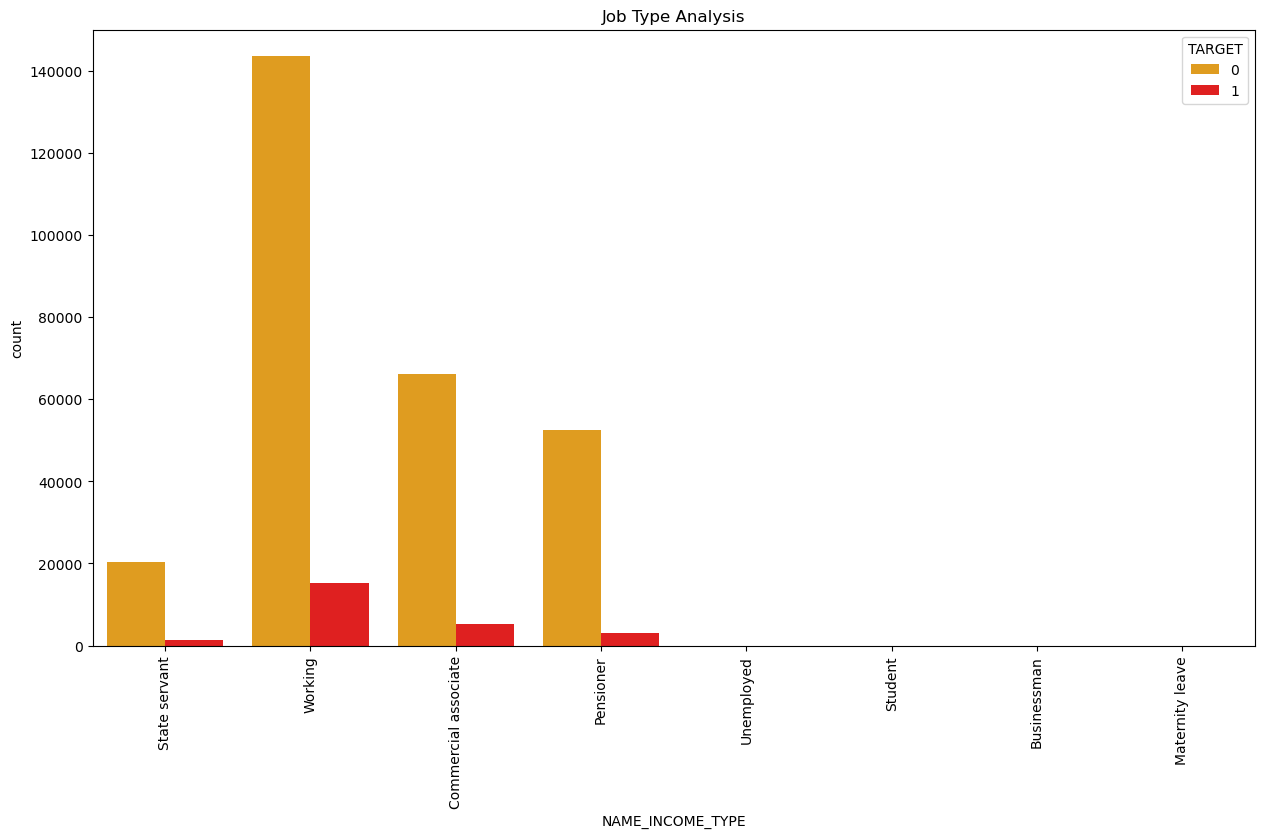

In [58]:
#INCOME_TYPE variable analysis for payment without difficulties(zeroes) and payment with difficulty(ones) dataframe.
# Set a darker color palette
dark_palette = ["#FFA500", "#FF0000"]

# Set the figure size
plt.figure(figsize=(15, 8))

# Create a countplot with 'hue' for target values
sns.countplot(data=pd.concat([zeroes, ones]), x='NAME_INCOME_TYPE', hue='TARGET', palette=dark_palette, order=zeroes['NAME_INCOME_TYPE'].unique())
plt.title('Job Type Analysis')
plt.ylim(0, 150000)
plt.xticks(rotation=90)

plt.show()

#### Conclusion: It can be seen that working and commercial associates can be lended loan as they repay it most likely among rest group of clients. 

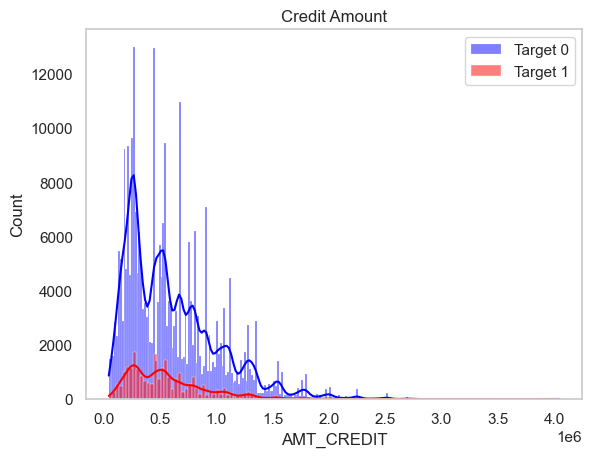

In [83]:
#Analysing continuous columns with target column
sns.histplot(zeroes['AMT_CREDIT'], kde=True, label="Target 0", color='blue')#Repaying without difficulties
sns.histplot(ones['AMT_CREDIT'], kde=True, label='Target 1', color='red')#Repaying with difficulties

plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5)
plt.title('Credit Amount')
plt.legend()
plt.grid(False)
plt.show()

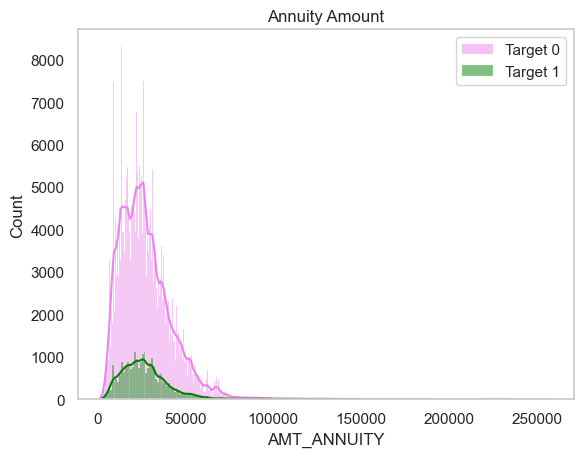

In [84]:
#Analysing continuous columns with target column
sns.histplot(zeroes['AMT_ANNUITY'], kde=True, label="Target 0", color='violet')#Repaying without difficulties
sns.histplot(ones['AMT_ANNUITY'], kde=True, label='Target 1', color='green')#Repaying with difficulties

plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5)
plt.title('Annuity Amount')
plt.legend()
plt.grid(False)
plt.show()

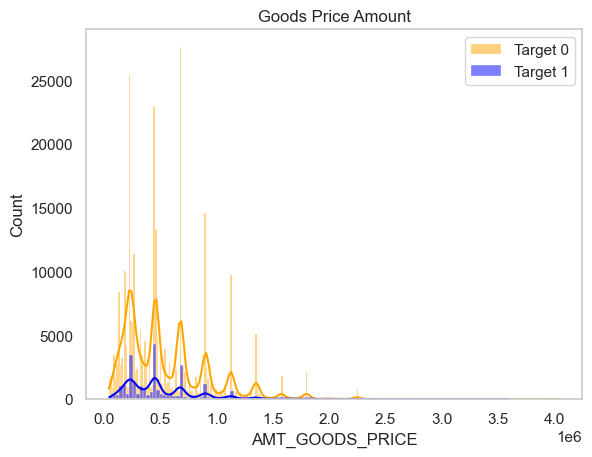

In [85]:
#Analysing continuous columns with target column
sns.histplot(zeroes['AMT_GOODS_PRICE'], kde=True, label="Target 0", color='orange')#Repaying without difficulties
sns.histplot(ones['AMT_GOODS_PRICE'], kde=True, label='Target 1', color='blue')#Repaying with difficulties

plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5)
plt.title('Goods Price Amount')
plt.legend()
plt.grid(False)
plt.show()

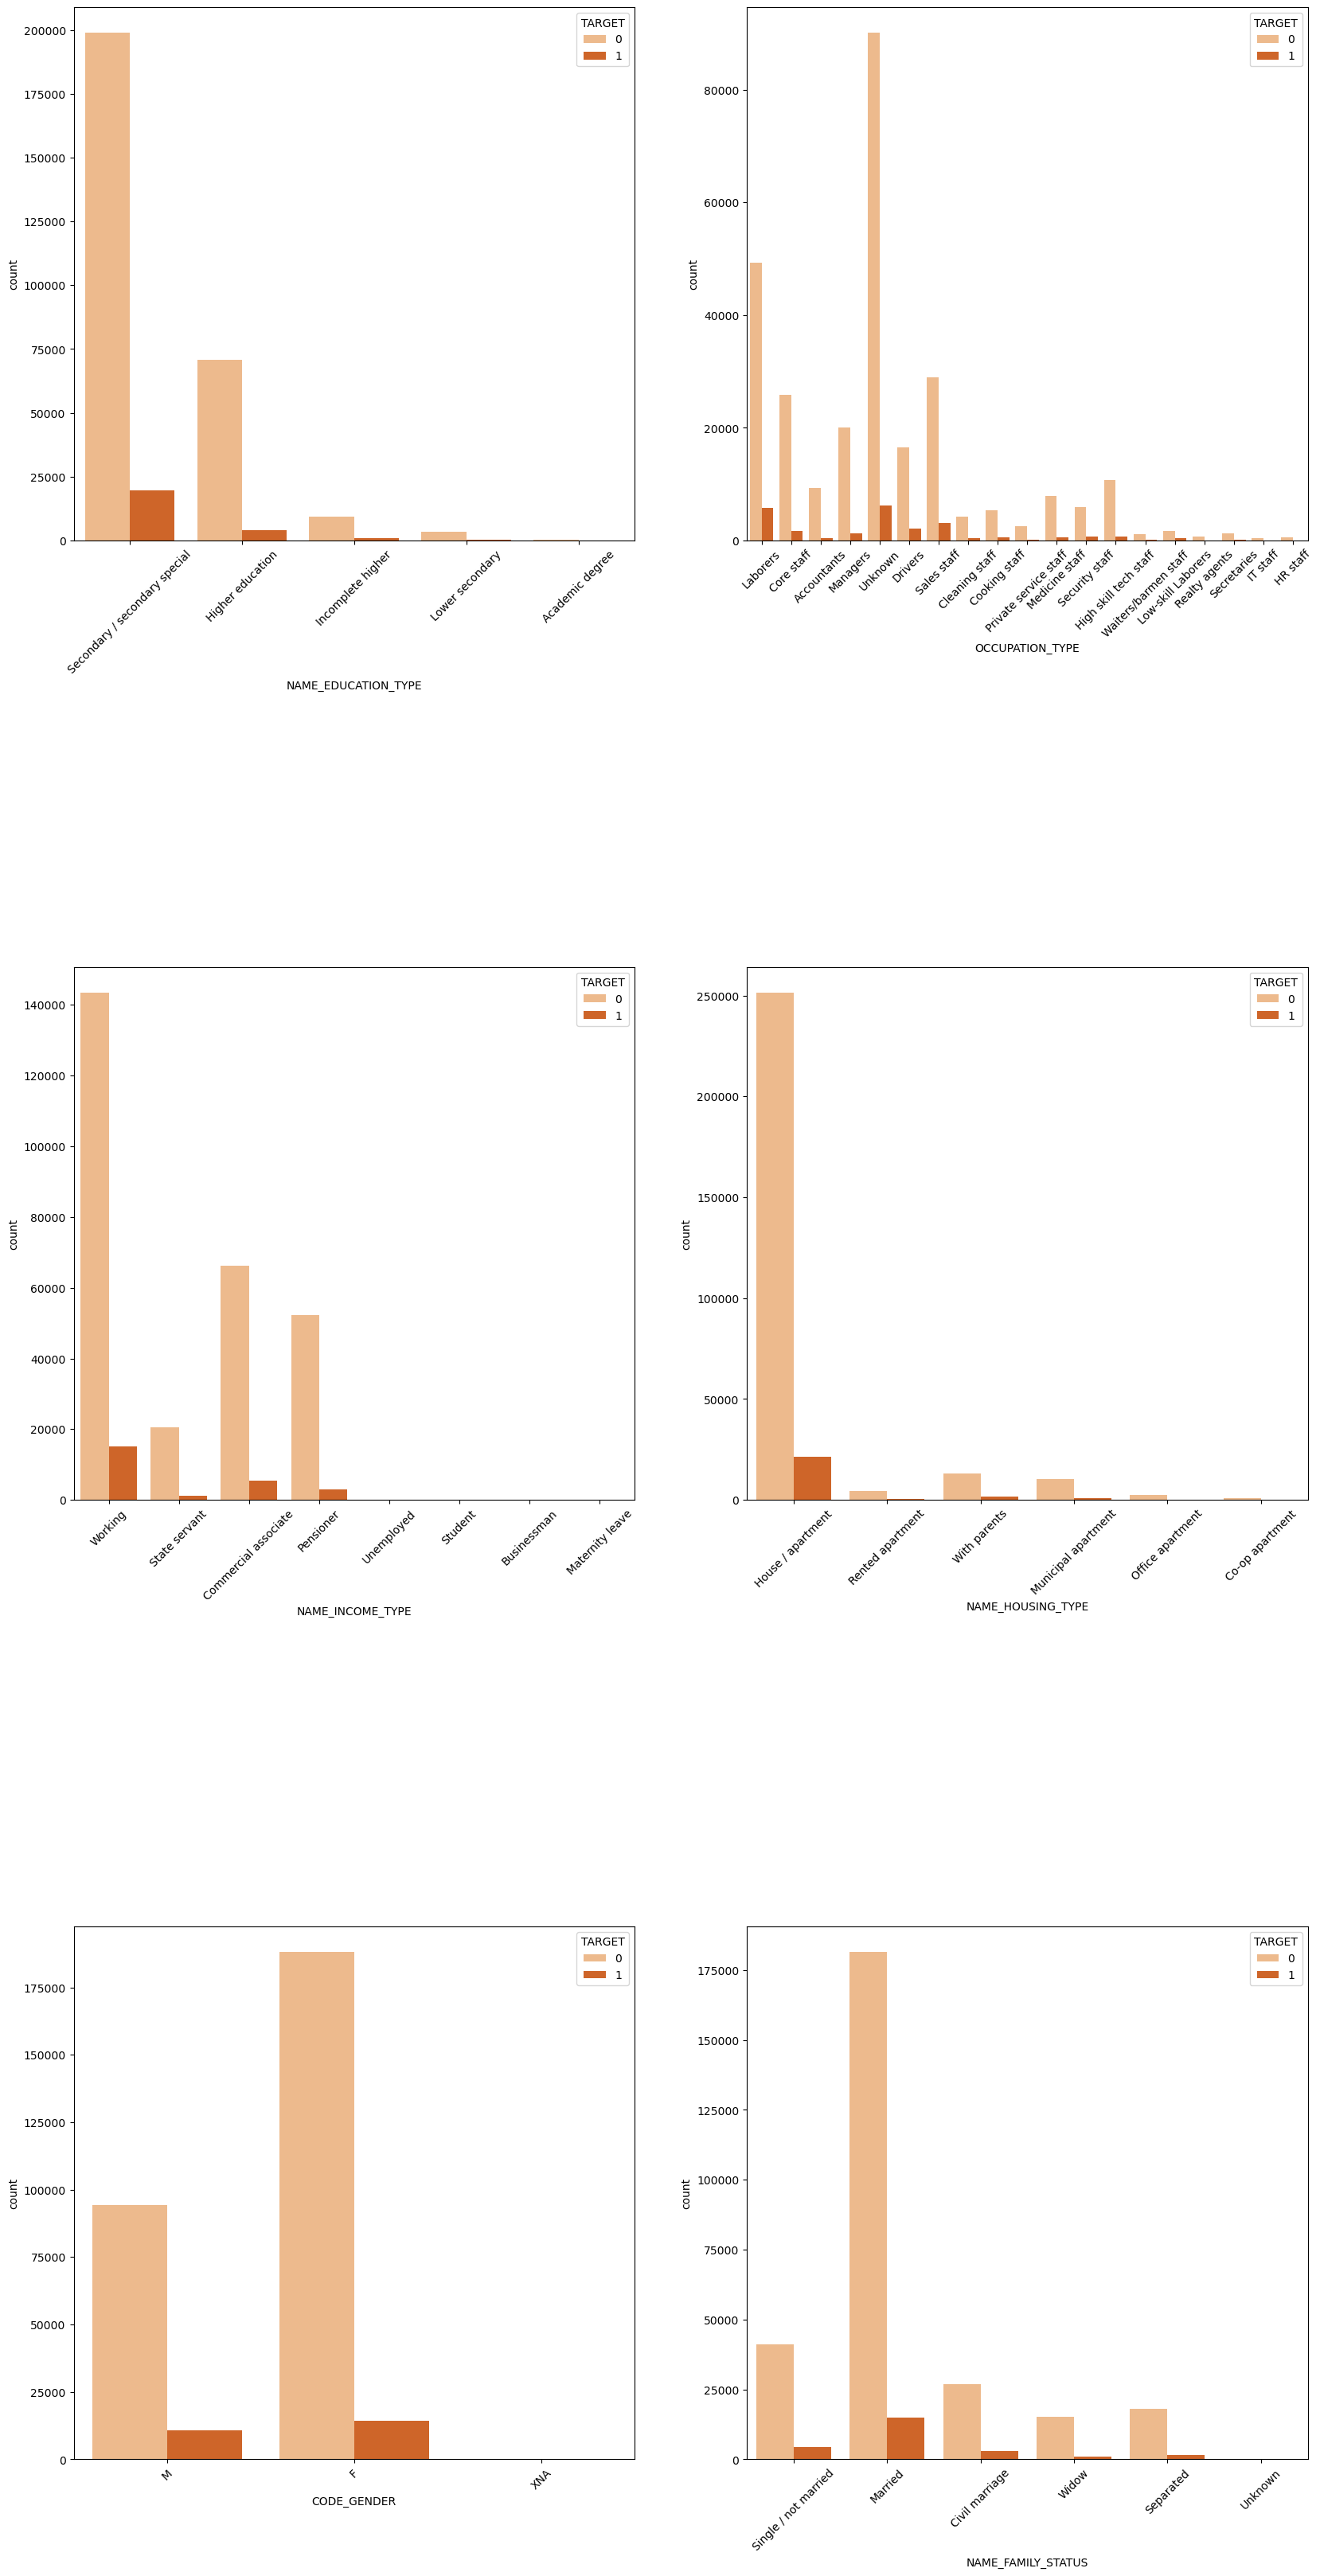

In [62]:
# Visulaising multiple columns wrt. target column with iterative subplots
features = ['NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE', 'CODE_GENDER', 'NAME_FAMILY_STATUS']

plt.figure(figsize=(20, 40))
plt.subplots_adjust(hspace=0.8)

for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)
    sns.countplot(x=feature, hue='TARGET', data=client_dat, palette='Oranges')
    plt.xticks(rotation=45)

plt.show()

#### Conclusions: 

1. Based on the first graph, it is evident that banks may want to consider targeting more female customers for loan services, as they demonstrate a higher tendency to make timely repayments.

2. The second graph suggests that lending institutions might find working clients to be a promising target for loans, as they exhibit a notably higher rate of on-time payments.

3. The third graph highlights that customers with secondary education qualifications are more likely to meet their payment deadlines compared to those with academic degrees.

4. In the fourth graph, it becomes apparent that married customers tend to have a better track record of making loan payments on schedule, in contrast to widowed and separated individuals.

5. The fifth graph reveals that customers who own their houses or apartments are the most reliable in terms of making timely payments, outperforming other customer categories.

6. The sixth graph underscores that both sales staff and core staff members have a significantly higher percentage of on-time payments, making them attractive candidates for loan services. 

### Correlation Analysis:

In [63]:
#For target_1 dataframe we find correlation
corr = ones.corr()

corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
corrdf = corr.unstack().reset_index()
corrdf.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute valucorrdf['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf.sort_values(by = 'Correlation', ascending = False).head(30)

,VAR1,VAR2,Correlation
1373,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
328,AMT_GOODS_PRICE,AMT_CREDIT,0.98
1099,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.96
974,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
1428,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87
274,AMT_ANNUITY,AMT_CREDIT,0.75
329,AMT_GOODS_PRICE,AMT_ANNUITY,0.75
1737,FLAG_DOCUMENT_6,DAYS_EMPLOYED,0.62
494,DAYS_EMPLOYED,DAYS_BIRTH,0.58
1736,FLAG_DOCUMENT_6,DAYS_BIRTH,0.39


In [64]:
# For the 'zeroes (paying with difficulty)' DataFrame, calculate the correlation matrix for all numerical columns
corr = zeroes.corr()

# Create a mask to select the upper triangular part of the correlation matrix
mask = np.triu(np.ones(corr.shape), k=1).astype(bool)

# Apply the mask to the correlation matrix
corr = corr.where(mask)

# Stack the correlation matrix and reset the index
corrdf = corr.stack().reset_index()
corrdf.columns = ['VAR1', 'VAR2', 'Correlation']

# Round the 'Correlation' values to two decimal places
corrdf['Correlation'] = corrdf['Correlation'].round(2)

# Take the absolute value of the 'Correlation' column
corrdf['Correlation'] = corrdf['Correlation'].abs()

# Sort the DataFrame by 'Correlation' in descending order and get the top 30 rows
corrdf.sort_values(by='Correlation', ascending=False).head(30)

,VAR1,VAR2,Correlation
907,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,1.00
391,DAYS_EMPLOYED,FLAG_EMP_PHONE,1.00
154,AMT_CREDIT,AMT_GOODS_PRICE,0.99
776,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.95
67,CNT_CHILDREN,CNT_FAM_MEMBERS,0.88
937,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.86
202,AMT_ANNUITY,AMT_GOODS_PRICE,0.78
153,AMT_CREDIT,AMT_ANNUITY,0.77
343,DAYS_BIRTH,DAYS_EMPLOYED,0.63
347,DAYS_BIRTH,FLAG_EMP_PHONE,0.62


#### Conclusion: From above analysis, it can be seen that most of the data are highly co-related.

## Now we will conduct numeric Bi-variate analysis 

### For this we will use scatter plot, correlation matrix and pair plot. 

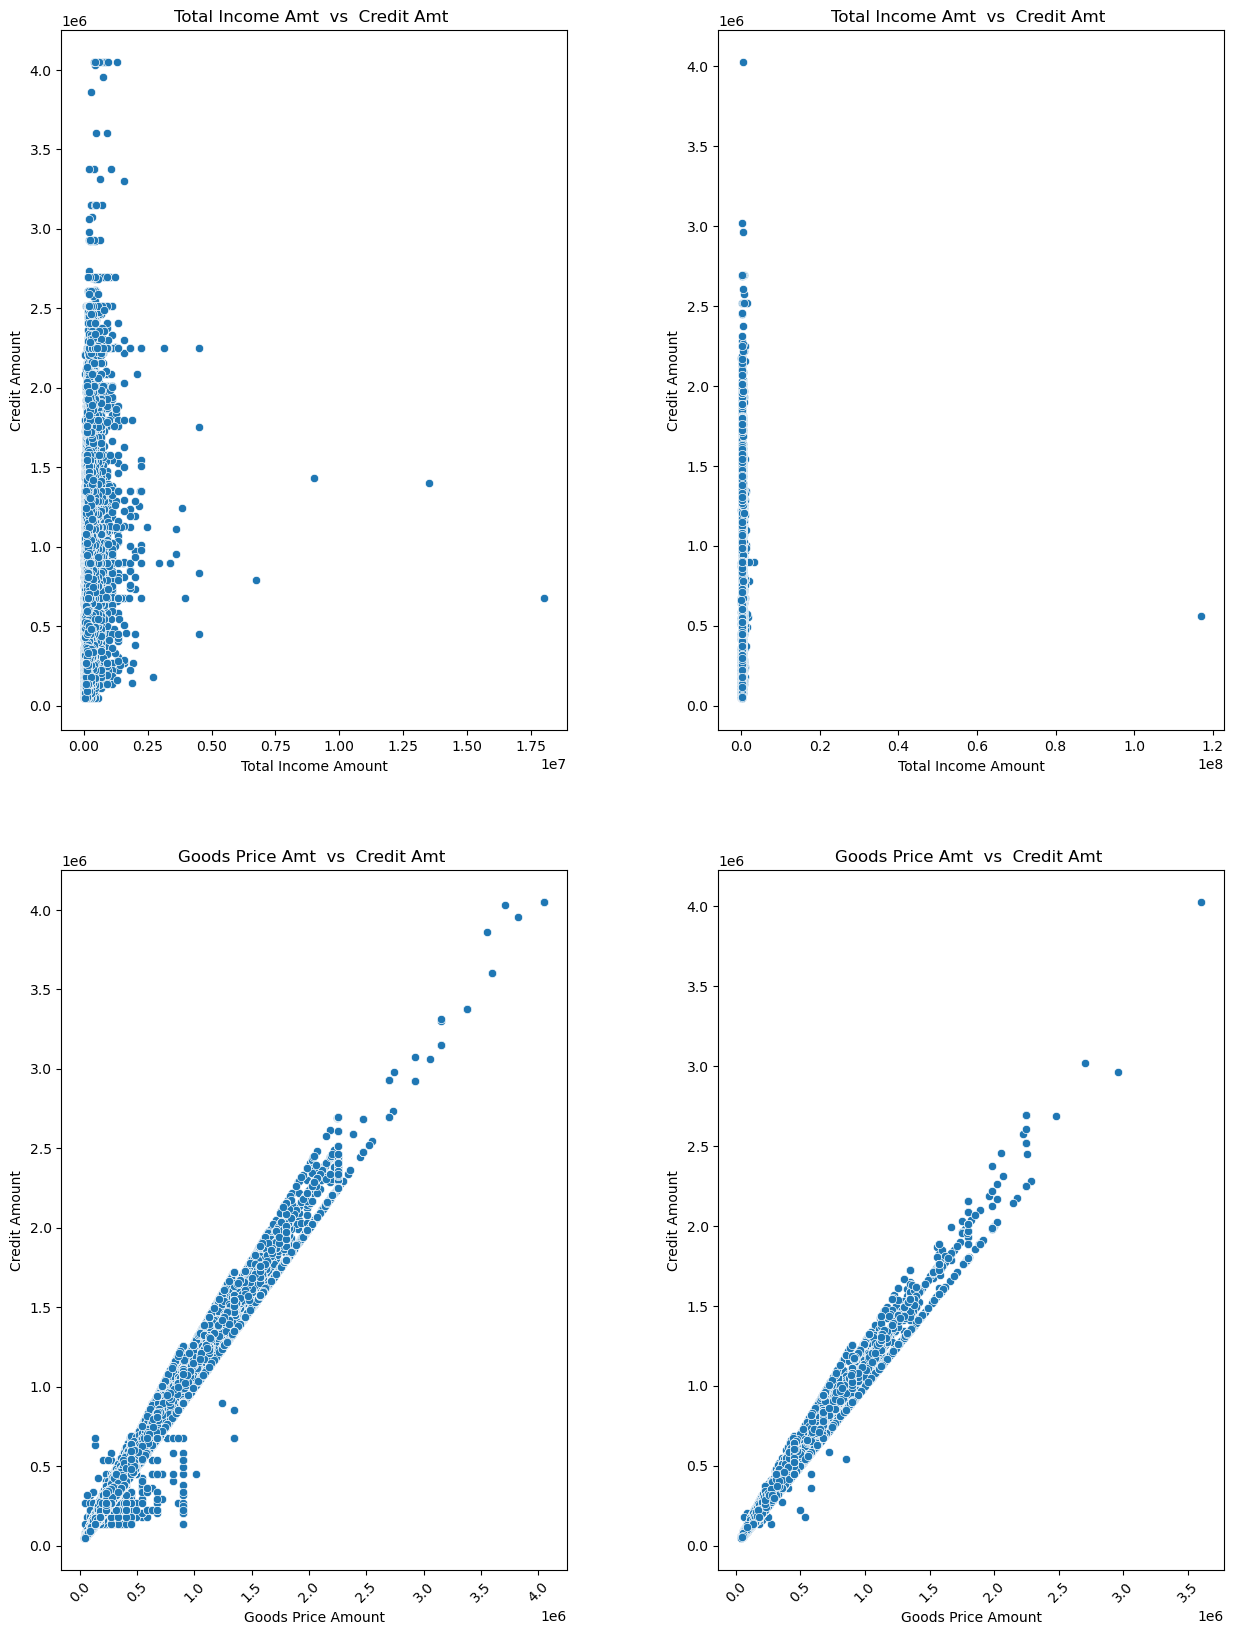

In [65]:
#Scatter plot for numeric columns

plt.figure(figsize = (15, 20))
plt.subplots_adjust(wspace=0.3)


plt.subplot(2,2,1)
sns.scatterplot(data=zeroes, x='AMT_INCOME_TOTAL', y='AMT_CREDIT')
plt.xlabel('Total Income Amount')
plt.ylabel('Credit Amount')
plt.title('Total Income Amt  vs  Credit Amt ')

plt.subplot(2,2,2)
sns.scatterplot(data=ones, x='AMT_INCOME_TOTAL',y='AMT_CREDIT')
plt.xlabel('Total Income Amount')
plt.ylabel('Credit Amount')
plt.title('Total Income Amt  vs  Credit Amt ')

plt.subplot(2,2,3)
sns.scatterplot(data=zeroes, x='AMT_GOODS_PRICE',y='AMT_CREDIT')
plt.xlabel('Goods Price Amount')
plt.ylabel('Credit Amount')
plt.title('Goods Price Amt  vs  Credit Amt ')
plt.xticks(rotation = 45)

plt.subplot(2,2,4)
sns.scatterplot(data=ones, x='AMT_GOODS_PRICE', y='AMT_CREDIT')
plt.xlabel('Goods Price Amount')
plt.ylabel('Credit Amount')
plt.title('Goods Price Amt  vs  Credit Amt ')
plt.xticks(rotation = 45)
plt.show()

#### Conclusion: 

1. Timely loan repayments often lead to improved credit scores, while individuals with lower incomes may encounter challenges meeting their installment obligations, resulting in lower credit ratings.

2. There exists a linear relationship between the price of goods and the credit amount. Clients who consistently make punctual repayments and possess higher-priced goods tend to enjoy higher credit scores.

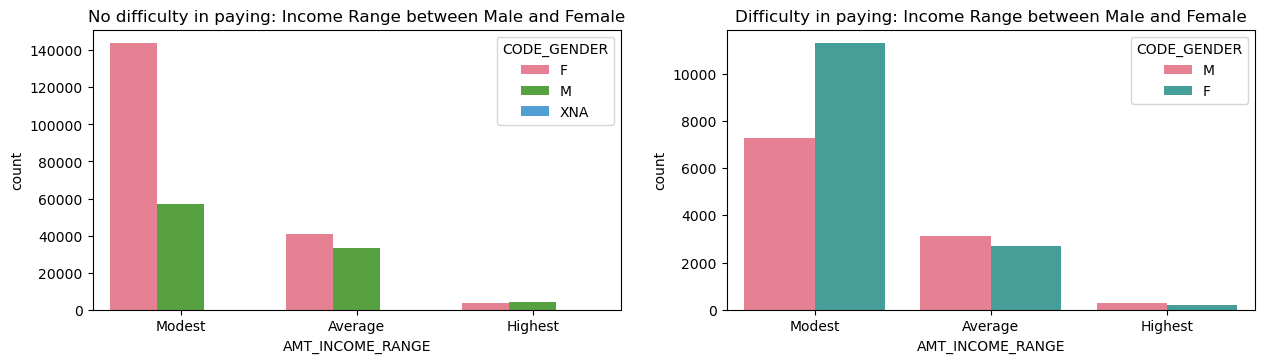

In [66]:
# Below code for analysing numerical variable from ones(having difficulty in paying) and zeroes(no difficulty in paying)
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plt.title('No difficulty in paying: Income Range between Male and Female')

sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=zeroes, palette='husl')

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Difficulty in paying: Income Range between Male and Female')

sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=ones, palette='husl')
plt.show()

#### Conclusion: It can be seen that females are better in repaying the amount back as compared to males. 

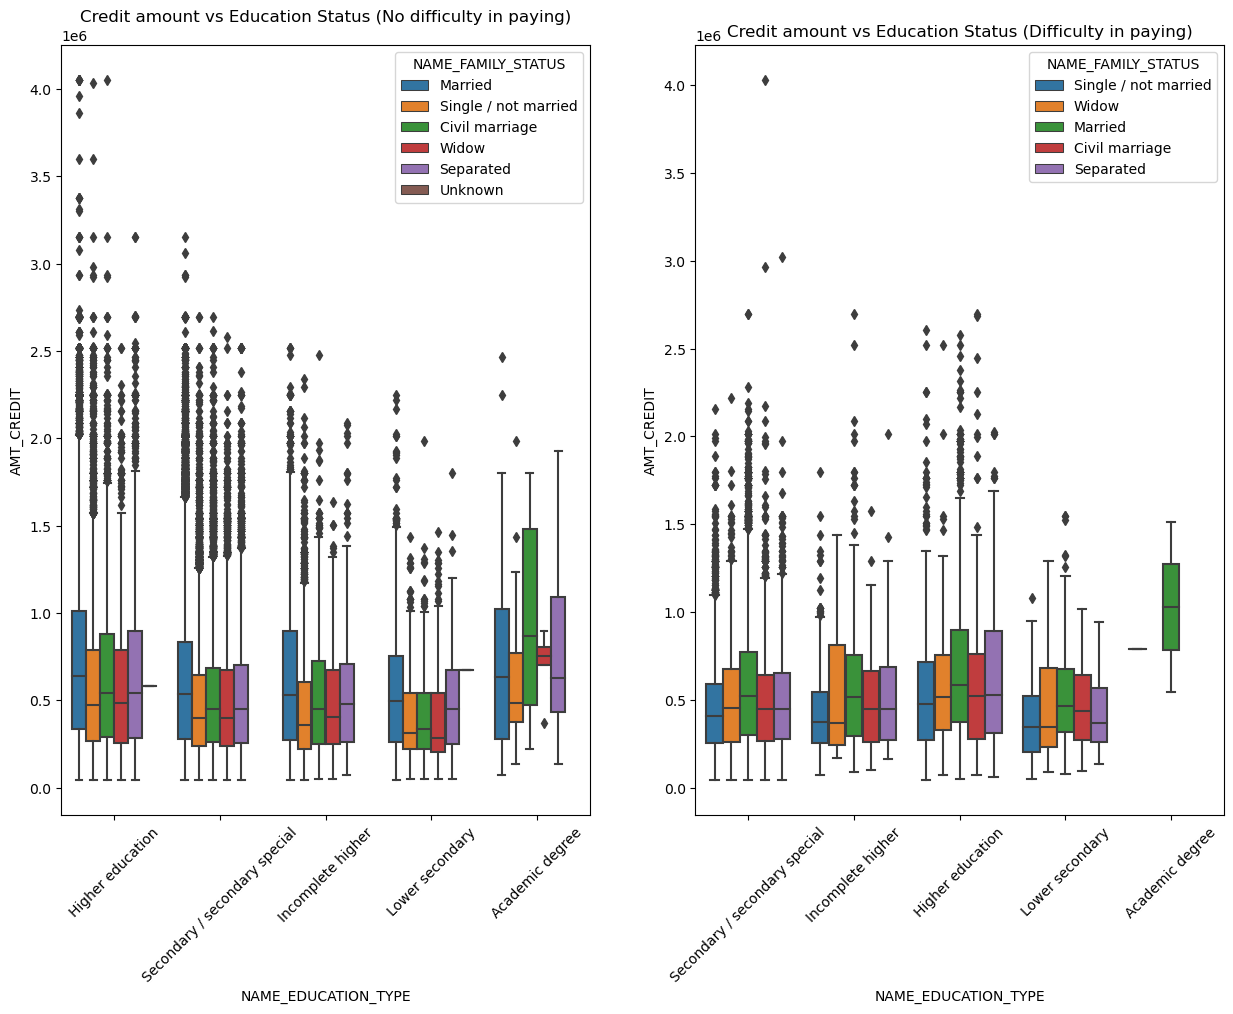

In [67]:
# Visualising credit amount analysis with box plot 

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

dataframes = [zeroes, ones]
titles = ['Credit amount vs Education Status (No difficulty in paying)', 'Credit amount vs Education Status (Difficulty in paying)']

for i, ax in enumerate(axes):
    sns.boxplot(data=dataframes[i], x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue='NAME_FAMILY_STATUS', orient='v', ax=ax)
    ax.set_title(titles[i])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

#### Conclusions:

1. Payment difficulties are primarily observed among married individuals with academic degrees.

2. Clients with higher education levels tend to have better credit profiles and encounter fewer payment difficulties.

3. Clients with secondary special education qualifications are more likely to experience payment difficulties despite having higher credit amounts.

4. Individuals with lower secondary education have notably low credit scores.

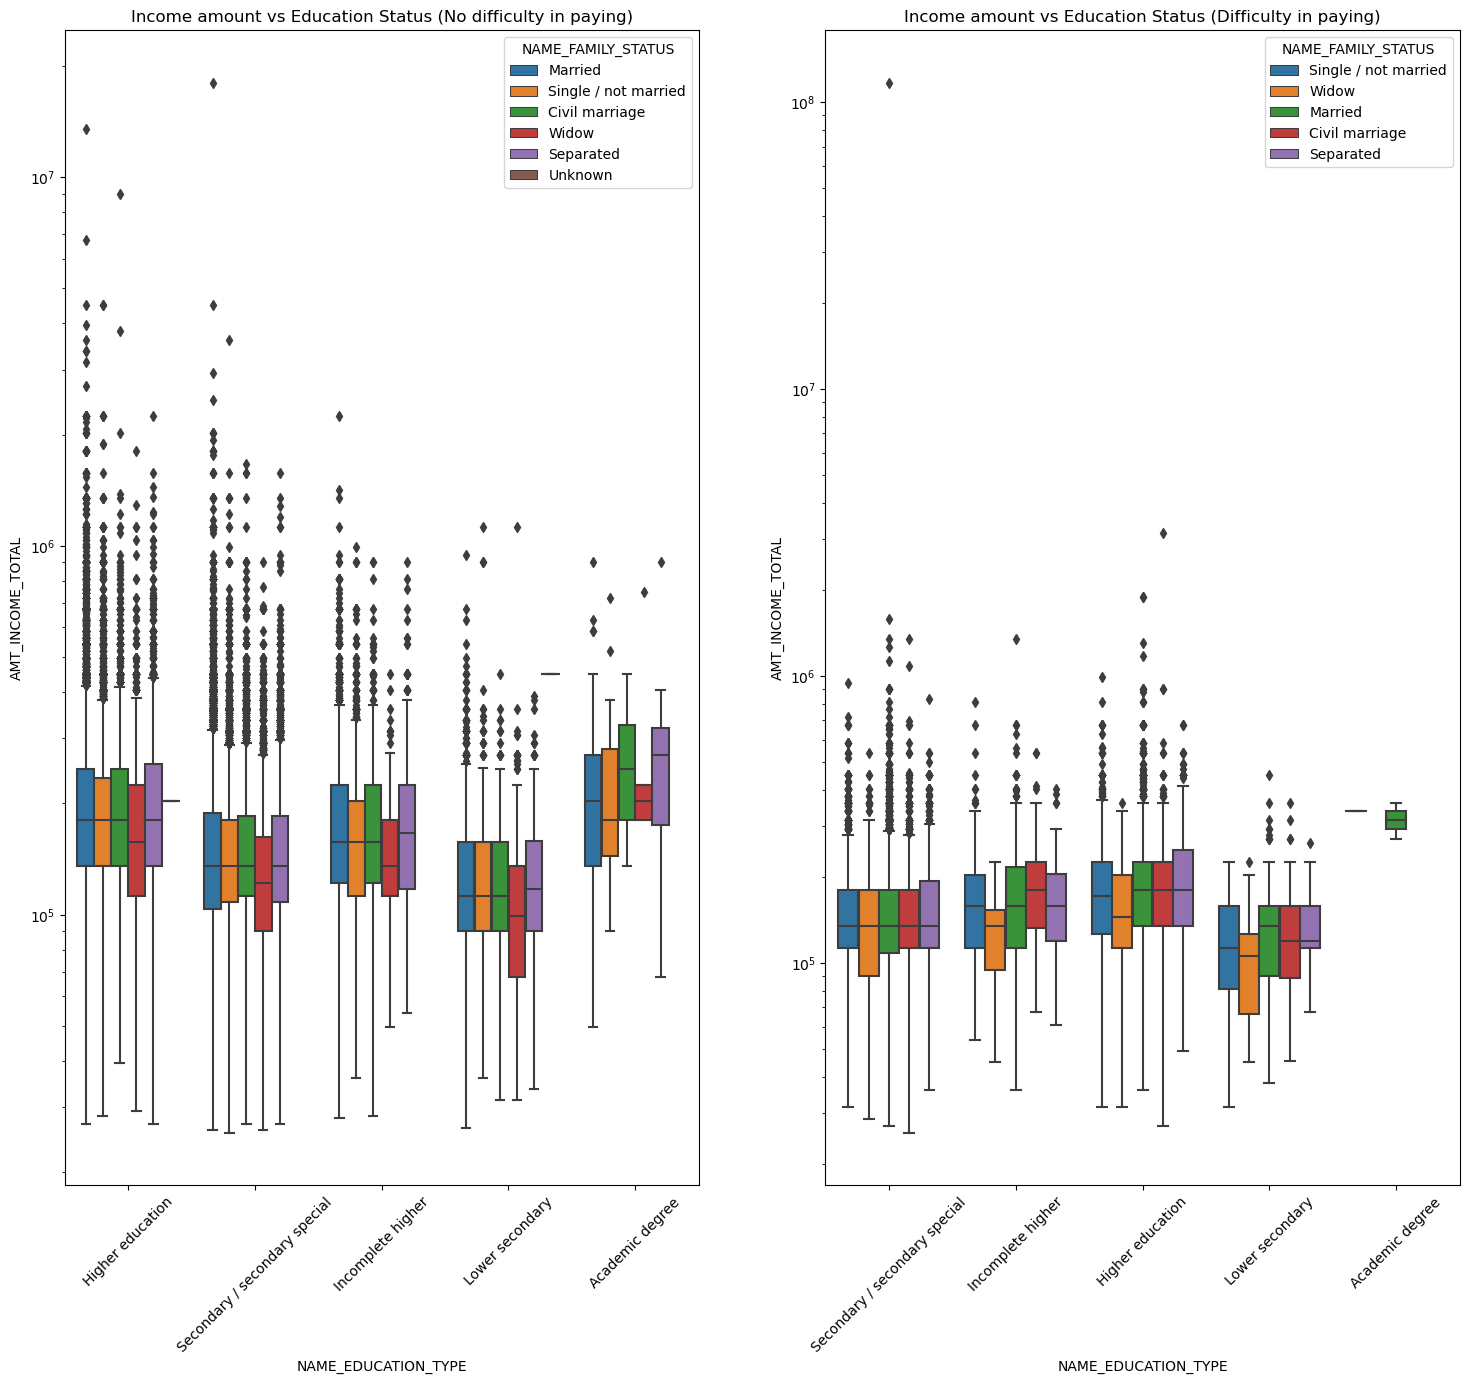

In [68]:
# Visualising Income amount analysis with box plot using log scale

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(18, 15))
titles = ['Income amount vs Education Status (No difficulty in paying)', 'Income amount vs Education Status (Difficulty in paying)']
targets = [zeroes, ones]

for i, ax in enumerate(axes):
    ax.set_yscale('log')
    sns.boxplot(data=targets[i], x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', hue='NAME_FAMILY_STATUS', orient='v', ax=ax)
    ax.set_title(titles[i])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

#### Conclusion: 

1. Clients with advanced education tend to enjoy higher incomes and exhibit fewer payment difficulties.

2. Individuals with lower income levels often face challenges in making payments, particularly within the secondary education category.

3. The category of higher education tends to exhibit a notable number of outliers in income distribution.

4. The lower secondary education category typically corresponds to lower income levels.

In summary, it can be inferred that clients with higher educational qualifications and better income prospects are more likely to meet their loan repayment obligations on time.

# "Previous_application" data analysis 

In [69]:
#Read the file previous_application data 
prean=pd.read_csv("previous_application.csv")
prean.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
#Check on info and description
prean.describe()
prean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [71]:
#Check on columns have more than half of data missing
(prean.isnull().sum() / len(prean)) * 100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [72]:
#Drop this columns
prean.drop(['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED'],axis=1,inplace=True)

In [73]:
# Also dropping unwanted columns to ease analysis
prean.drop(['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL'],axis=1,inplace=True)

In [74]:
#Check on shape after all dropped off columns
prean.shape

(1670214, 23)

In [75]:
#All the other columns with null values can be looked as missing or imputed with an statistical std. value
prean.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [76]:
# Join this previous application data with current application data
all_dat = client_dat.merge(prean, on='SK_ID_CURR', how='inner')
all_dat.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [77]:
#Check on shape and info of this new dataframe
all_dat.info()
all_dat.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 96 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  object  
 3   CODE_GENDER                  1413701 non-null  object  
 4   FLAG_OWN_CAR                 1413701 non-null  object  
 5   FLAG_OWN_REALTY              1413701 non-null  object  
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64 
 11  NAME_TYPE_SUITE_x            1413701 non-null  object  
 12  NAME_INCOME_TYPE            

(1413701, 96)

## Consider univariate analysis on this new dataframe

<Axes: title={'center': 'Distributing contract status with respect to purposes'}, xlabel='count', ylabel='NAME_CASH_LOAN_PURPOSE'>

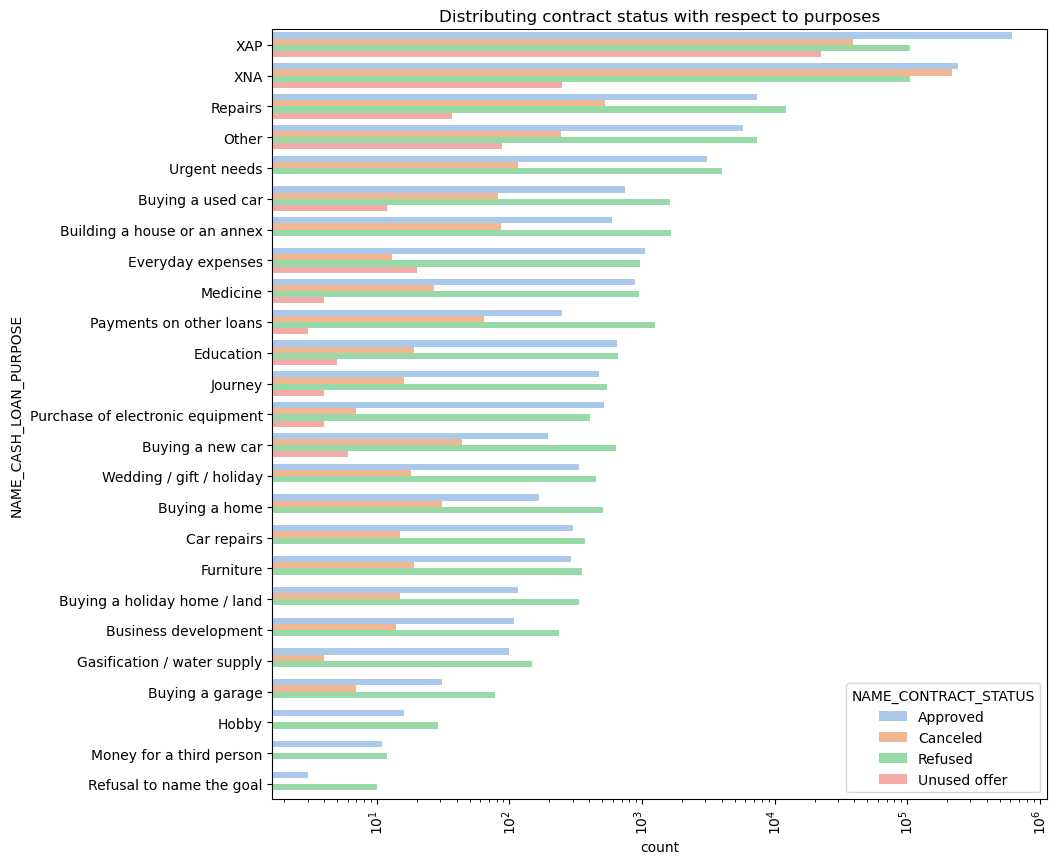

In [78]:
# Visualising distribution of contract status
plt.figure(figsize=(10, 10))
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distributing contract status with respect to purposes')

sns.countplot(data=all_dat, y='NAME_CASH_LOAN_PURPOSE', order=all_dat['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue='NAME_CONTRACT_STATUS', palette='pastel')

#### Conclusions: 

(a) Medicine and Education have an equal count of offers, with an identical number of approvals and refusals.

(b) Repairs exhibits a higher number of refusals than approvals, indicating a notable default rate associated with this category.

(c) The category of Buying a car also demonstrates a greater count of refusals compared to approvals, signifying that financial institutions perceive it as a higher-risk application.

(d) This category has a substantial quantity of missing values.

<Axes: title={'center': 'Distributing contract status with respect to target'}, xlabel='count', ylabel='NAME_CASH_LOAN_PURPOSE'>

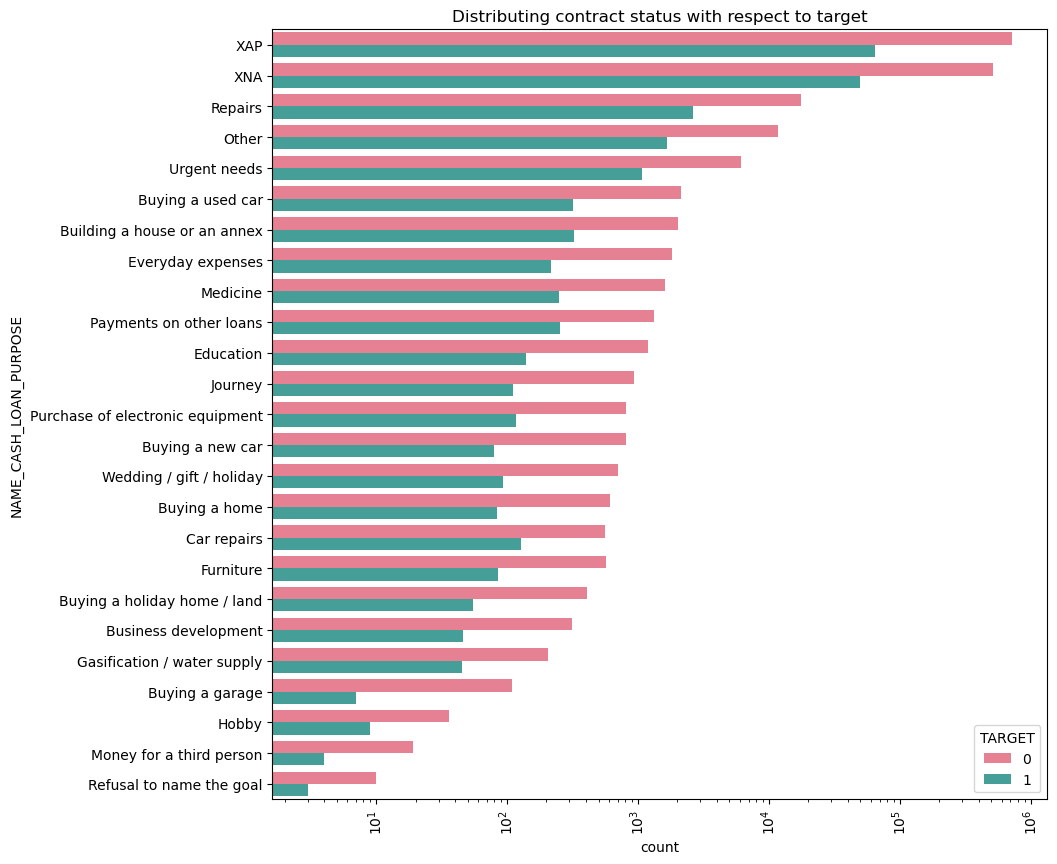

In [79]:
# Visualising distribution of contract status
plt.figure(figsize=(10, 10))
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distributing contract status with respect to target')

sns.countplot(data=all_dat, y='NAME_CASH_LOAN_PURPOSE', order=all_dat['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue='TARGET', palette='husl')

#### Conclusion:
In this case, clients who applied for loans with the purpose of "repairs" appear to experience the highest challenges when it comes to loan repayment. However, there are instances, such as "education," "Buying a Home," and "Business development," where borrowers encounter fewer difficulties in meeting their payment obligations. Hence, these specific categories may be deemed as more favorable for loan approvals.

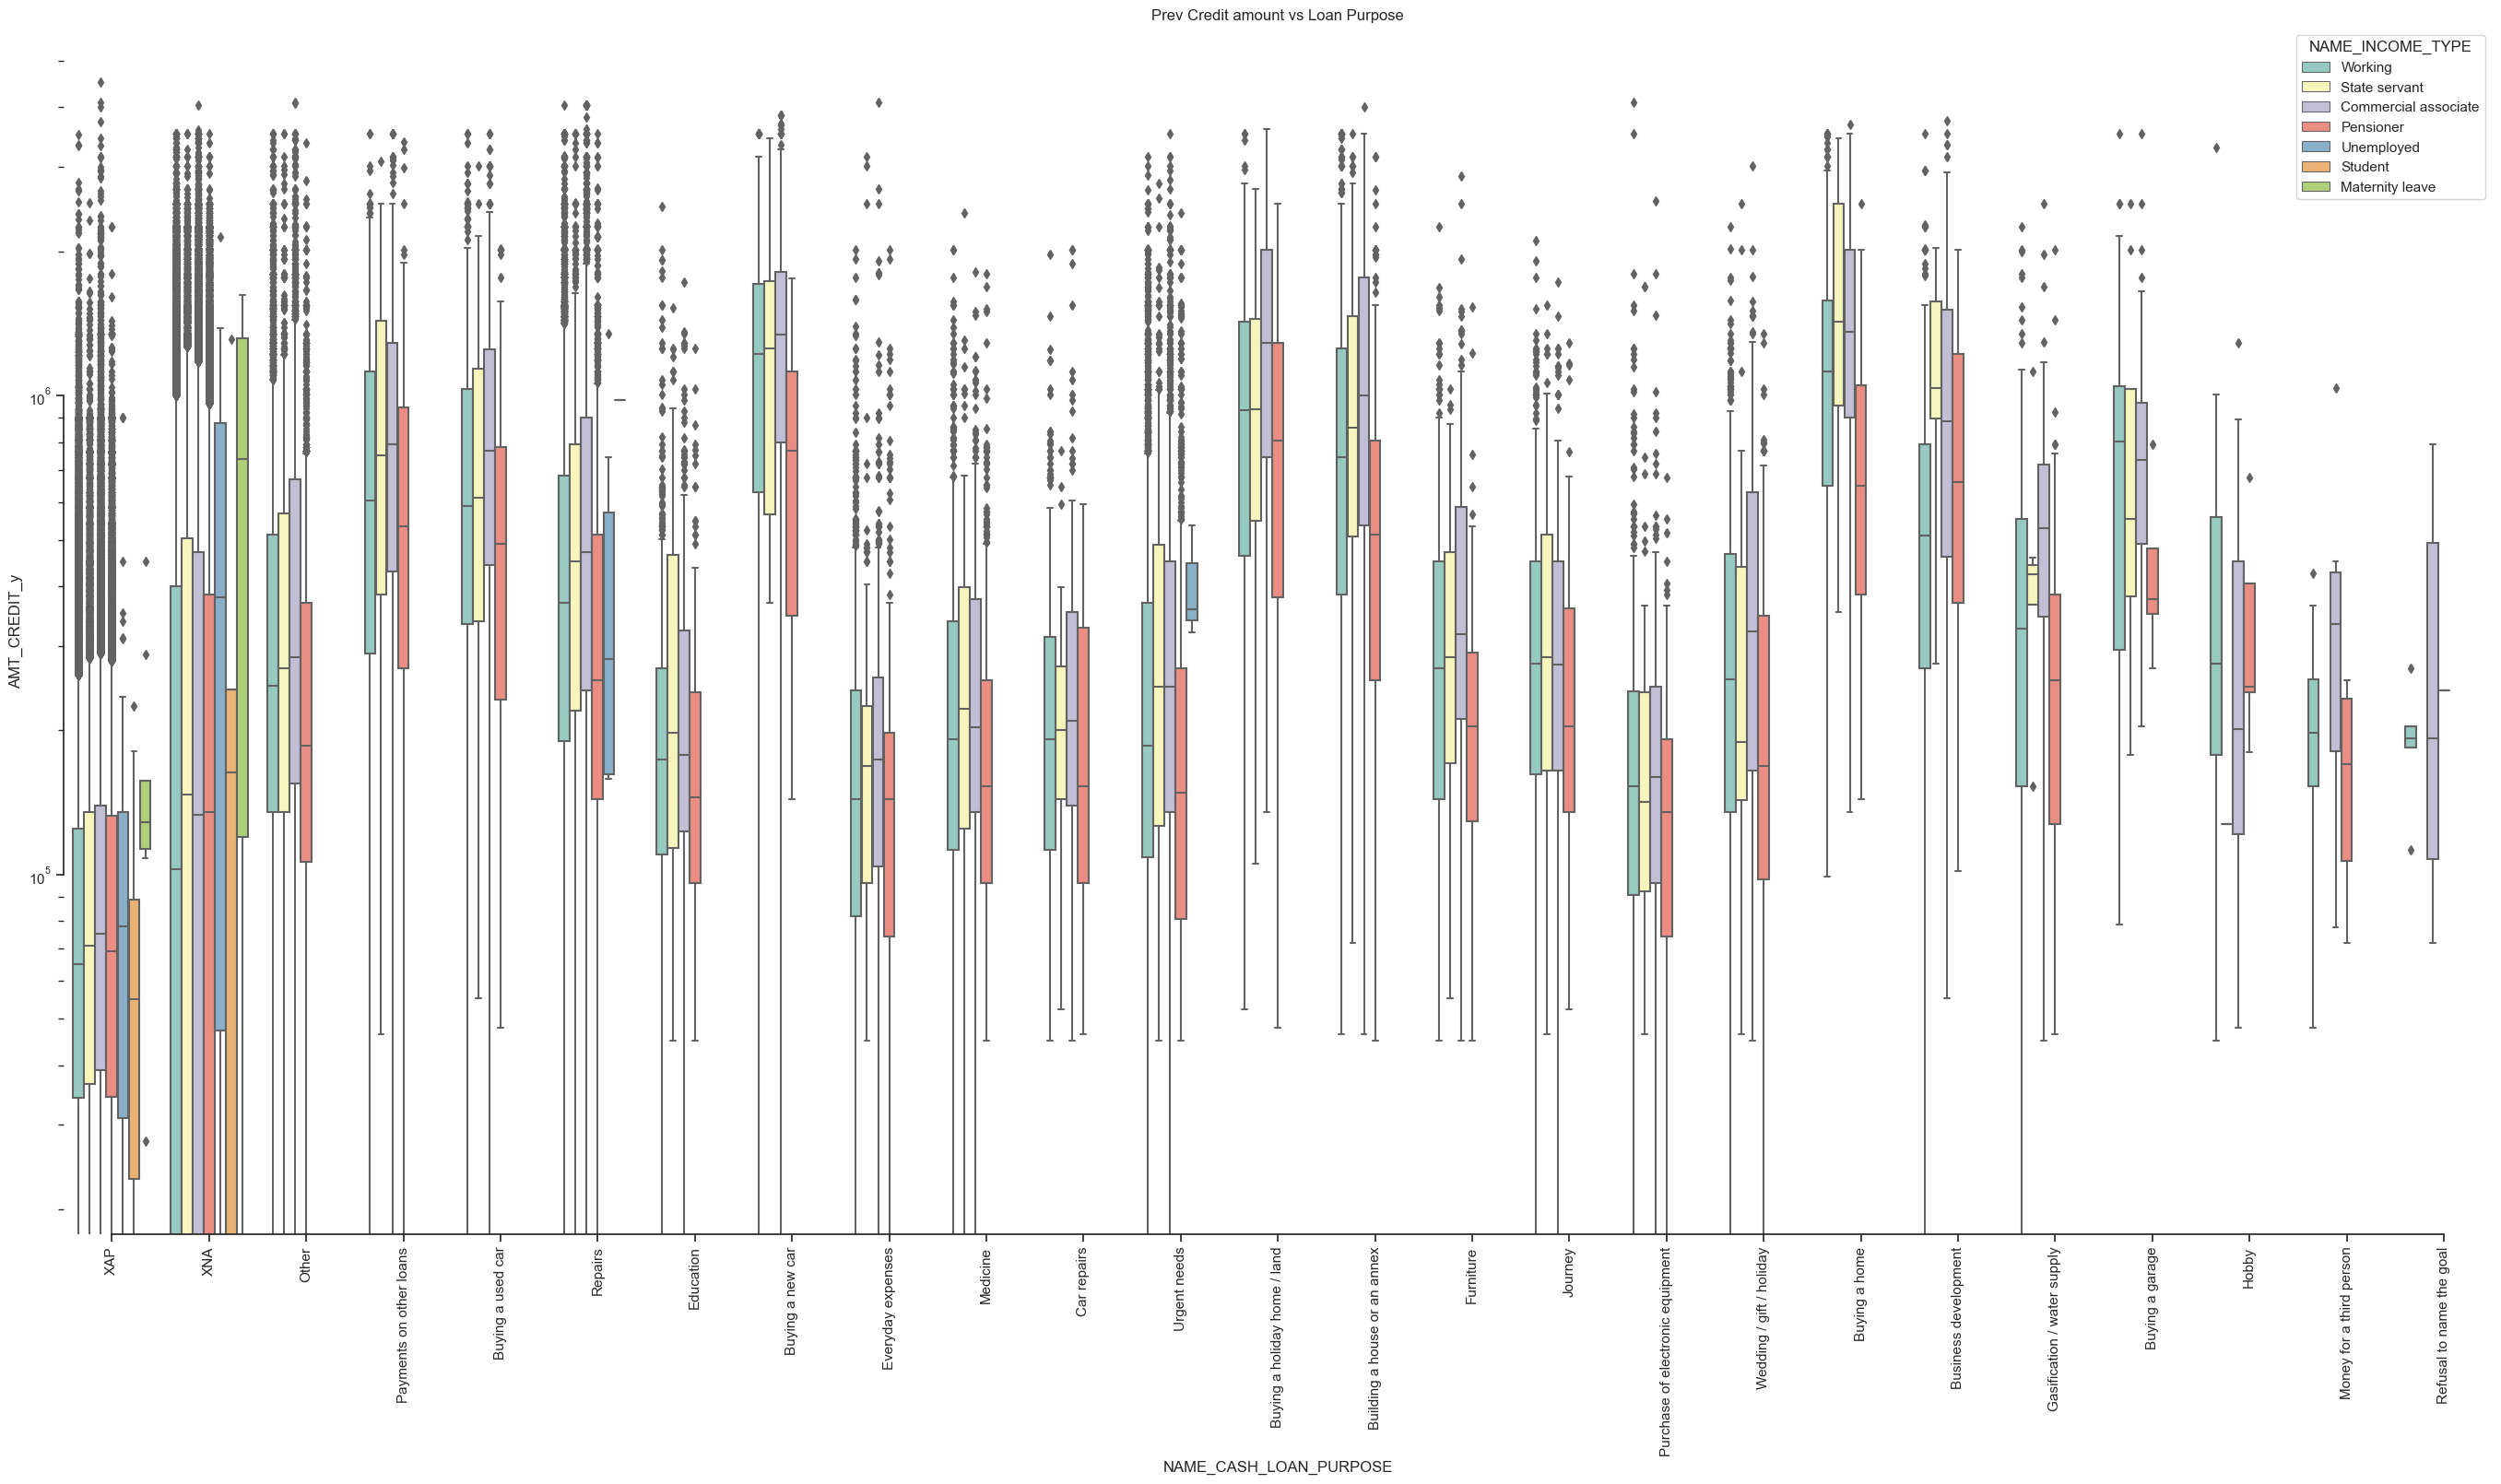

In [80]:
#Visulaization using box plot credit amount vs. loan purpose
plt.figure(figsize=(34, 17))

sns.set_context("notebook", rc={"xtick.labelsize": 18})
sns.set(style="ticks")
sns.boxplot(data=all_dat, x='NAME_CASH_LOAN_PURPOSE', hue='NAME_INCOME_TYPE', y='AMT_CREDIT_y', orient='v', palette='Set3')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Prev Credit amount vs Loan Purpose')

sns.despine(trim=True)
plt.show()

#### Conclusion:
The loan purposes, such as 'Buying a home,' 'Buying a land,' 'Buying a new car,' and 'Building a house,' typically have higher credit amounts. Among those who are state servants, purchasing a new home tends to result in a notably higher credit amount, while the 'Hobby' category generally has lower credit amounts. On the other hand, individuals with a 'Working' income type often secure the highest credit amounts when purchasing a new home.

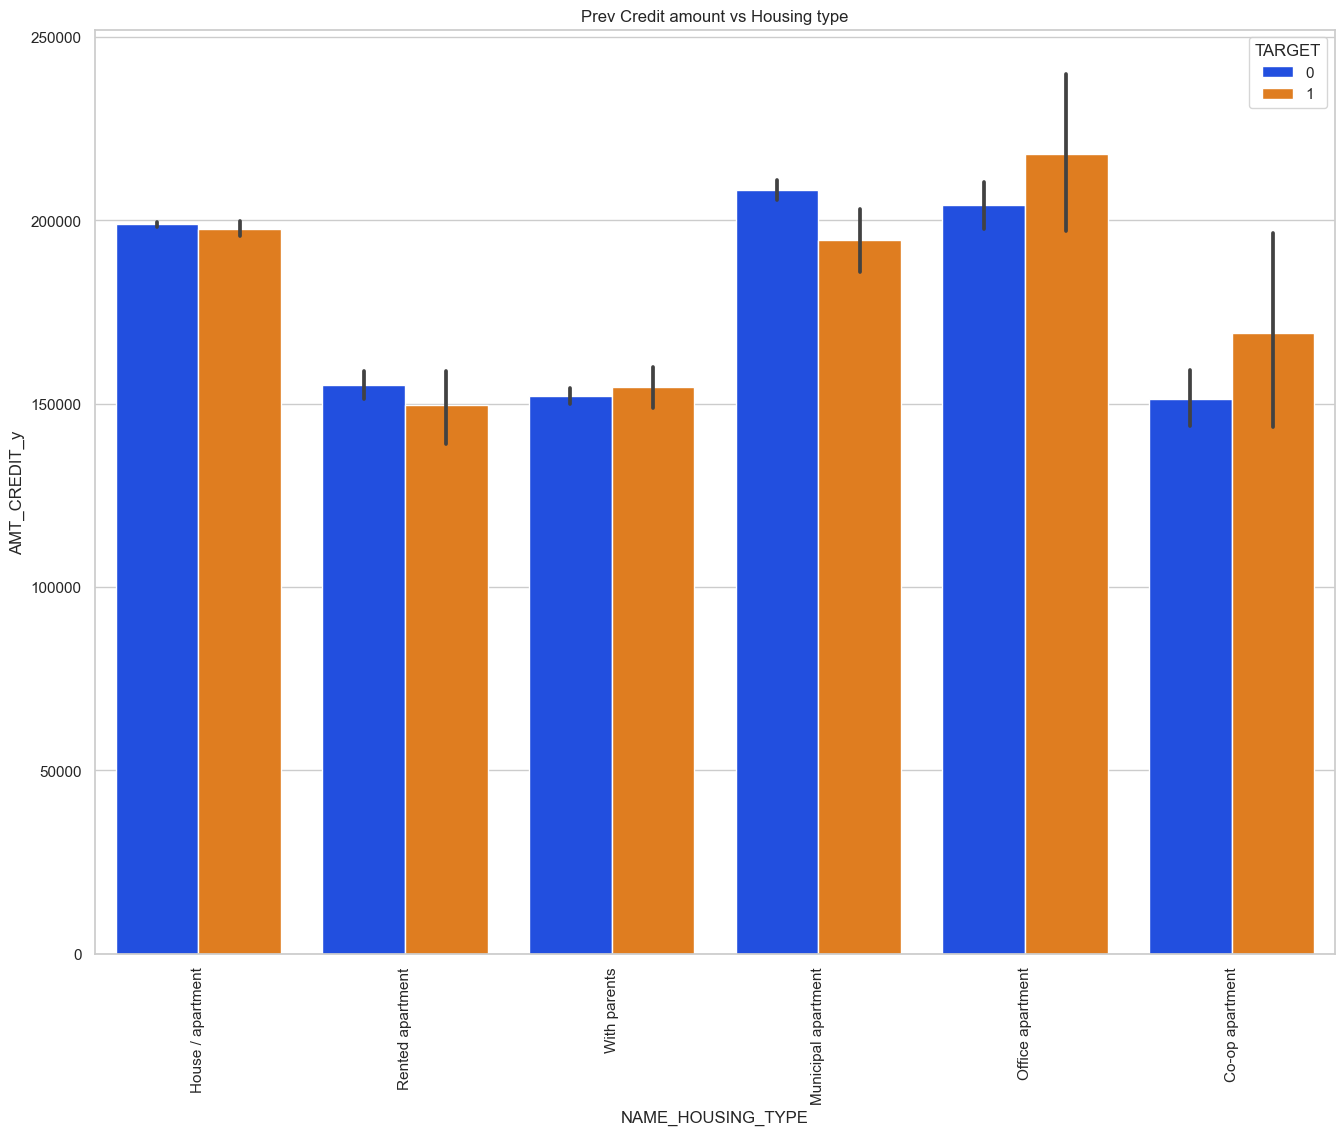

In [81]:
# Visualising previous credit amount with housing type using box plot with log scale
plt.figure(figsize=(16, 12))
sns.set(style="whitegrid")

sns.barplot(data=all_dat, y='AMT_CREDIT_y', hue='TARGET', x='NAME_HOUSING_TYPE', palette="bright")
plt.xticks(rotation=90)
plt.title('Prev Credit amount vs Housing type')

plt.show()

#### Conclusion:
Residents of office apartments tend to face significant challenges in repaying loans, while those residing in municipal apartments generally experience fewer difficulties in loan repayment. Therefore, it would be prudent for banks to prioritize clients with municipal apartment housing when considering loan applications.

### Final Remarks: In summary, following a thorough analysis of the datasets, banks can identify key attributes that play a pivotal role in determining loan approvals, as well as in predicting whether a client is likely to be a responsible repayer or a potential defaulter. These attributes encompass NAME_EDUCATION_TYPE, NAME_INCOME_TYPE, ORGANIZATION_TYPE, DAYS_BIRTH, AMT_INCOME_TOTAL, and CNT_CHILDREN. 